## Quantitative Modeling 


     Statistical Learning * Machine Learning  * Deep Learning


Modeling real-world phenomena:

## Traditional approach:

Modeling the relationship between a response (output or dependent variable) y  and an input (explanatory or independent variable) x. That is, finding a function y = f(x) that will take the input x and produces an output y.


- ### Mathematical formula:

In standard mathematical modeling, the function $f$ is exact.


 - ### Statistical Learning:


Linear Regression: if y is a continuous valued response.

 - A linear model is a line defined as follows:  $f(x) = mx + b$. 
 
 
Simple Regression is a good start off point for newer statistical learning approaches. 

- Logistic Regression: if y is a categorical valued response.

The equation $p(y|x) = w_0 + w_1 x$ allows to compute the conditional probability of y given x.


Linear regression can be understood as finding the best-fitting straight line through the sample points. An alternative notation used in ML is $y = w_0 + w_1 x$ where the weight $w_0$ represents the y-axis intercepts and $w_1$ is the coefficient of x (slope of the regression line).

Randomness vs Uncertainty: Recall that each model always contains some amount of random irreducible error $\epsilon$. So, given a prediction $\hat{y}$, the actual $y = \hat{y} + \epsilon$. 

Finding the function y = f(x) using statistical learning is achieved by minimizing the offsets or residuals of the data from the regression line ie the errors of our prediction.

### Pros:

Traditional quantitative modeling approach provides interpretable results and works quite well on many real-world problems.

### Cons:

It assumes the relationship between x and y is static. 

In statistical learning approach:

- linearity assumption means that the change in the response y due to a one-unit change in x remains constant, regardless of the value of x.

- Normality assumption is a requirement for standard statistical and hypothesis tests


These modeling assumptions are too restrictive and often violated in practice.


## Modern approach: Machine Learning 

Building a linear regression model using a data set that meets the linearity and normality assumption 

In [197]:
#imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from keras.layers.core import Dense

%matplotlib inline
plt.style.use("fivethirtyeight")

In [163]:
# load the data

df = pd.read_csv('C:/Users/uknow/Desktop/Regression.csv')
df.tail()

,TV,sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [164]:
#Check the size of dataset
df.shape

(200, 2)

This dataset contains information about money spent on TV ads and the generated sales. 
The goal here is to understand how TV advertisement spending impacts sales.

In [165]:
# We have input x = TV and output y = sales. 

x = df['TV'].values.reshape(-1,1)
y = df['sales'].values.reshape(-1,1)


We want to find the relationship y = f(x).

Before creating the model let's


## Visualize the relationship between x and y:

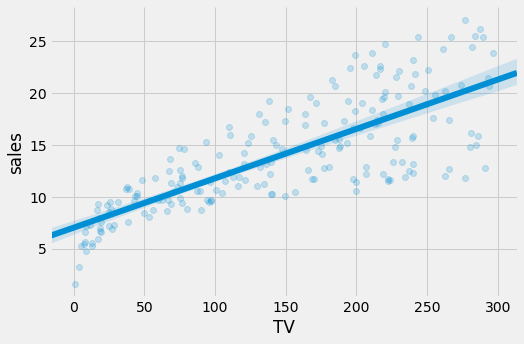

In [166]:
# seaborn scatterplot with regression line
sns.lmplot(x='TV', y='sales', data=data, aspect=1.5, scatter_kws={'alpha':0.2});


The graph shows a clear linear relationship between the amount spent on TV ads and sales.

Now, let’s go and find the linear regression model associated with this data.

### Build a Linear Regression Model 

Finding the relationship y = f(x) using Machine Learning approach means fitting a linear model to the given data aka "model training":

In [167]:
from sklearn.linear_model import LinearRegression

#Instantiate and fit a LinearRegression model on x and y using scikit-learn
lm = LinearRegression()
lm.fit(x, y)

print("The linear model y = f(x) is: y = {:.5} + {:.5}x".format(lm.intercept_[0], lm.coef_[0][0]))

The linear model y = f(x) is: y = 7.0326 + 0.047537x


## Interpretation

The problem we solved is to approximate the mathematical formula: $ y = 7.0326 + 0.047537* x$

- #### Conventional programming approach:

Built a Python function, an algorithm that directly performs this calculation.

- #### We used a machine learning approach: 

Given the x and y values we train a model that figures out the formula through the training process.

### Evaluation Metrics 

Assessing the relevancy of the model using **$R^2$-value** and the **p-value** from model coefficients:

In [168]:
from sklearn.metrics import r2_score
import statsmodels.api as sm

X = sm.add_constant(x)
ols = sm.OLS(y, X)
est = ols.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           1.47e-42
Time:                        01:27:58   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

- The estimated model coefficients have a small p-value. This implies that there is a strong correlation between x and y.

- R² = 0.612 means that 61% of the variability of sales can be explained by the amount spent on TV ads.



In addition to the $R^2$ value, here are 2 metrics commonly for regression problems:

**Mean absolute error (MAE)** is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean squared error (MSE)** is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$


While plenty of insight can be found in reading coefficients, the most common uses of data science focus on prediction.

## Using our model $y = 7.0326 + 0.047537*x$  for predictions


In scikit-learn we can make predictions from a fitted model using `.predict()`:


In [169]:
# we could make our predictions like this:
preds = x.dot(lm.coef_) + lm.intercept_
preds

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431],
       [10.17476548],
       [17.23871025],
       [ 8.16396559],
       [11.66741599],
       [16.73482186],
       [16.32125309],
       [10.25557777],
       [20.40940417],
       [10.32212907],
       [14.03474068],
       [17.41459582],
       [18.31779199],
       [ 7.6600772 ],
       [17.88520856],
       [ 9.99412625],
       [19.52997632],
       [13.82557947],
       [18.44614092],
       [18.85970969],
       [10.38868036],
       [20.95607553],
       [12.39948025],
       [11.653155  ],
       [19.65832525],
       [11.58185004],
       [20.85149492],
       [19.72012288],
       [10.58358059],
       [ 9.08142275],
       [17.87094757],
       [16.65876324],
       [15.44657891],
       [20.98935118],
       [16.86792445],
       [ 8.22576322],
       [15

In [170]:
preds.shape

(200, 1)

In [171]:
x_new = [[0], [10]]
lm.predict(x_new)

array([[7.03259355],
       [7.50795995]])

## Deep Learning

- Deep Learning is a subset of Machine Learning that uses neural networks.

Traditional linear regression uses Ordinary Least Squares (OLS) - a method that allows to estimate the parameters of the regression line by minimizing the sum of squared errors (or residuals).

In deep learning, we solve for the regression parameters using gradient descent that learns the weights via an GD or SGD optimization algorithm that minimizes a cost function that is the Sum of Squared Errors (SSE).

- ### Neural Networks


Training a linear regression model using Neural Networks does not require that the explanatory or target variables are normally distributed.


Layers are the basic unit of neural networks. Basic types:

  - The input layer = x and y data 
  - Add hidden layer(s) to detect non-linear patterns within our data
  - The output layer = set of probabilities for our prediction (ie, sklearn's predict_proba method)

A neural network with at least two hidden layers is 'Deep Learning'.

A neural network without a hidden layer is just a linear model.

A Logistic Regression is the simplest possible implementation of a neural network.


#### Hidden layers

When building a linear model, by adding a columns to lm.coef_ will add an additional column of output predictions. This second layer are not actual predictions - they represent a hidden layer, where each additional column is referred to as a neuron (unit).


In [174]:
# Input layer is our data:

input = x
x.shape

(200, 1)

In [80]:
#Initialize another hidden layer with 10 units
import numpy as np
hidden_unit = np.random.normal(0, 0.1, 20).reshape(2, 10)

In [84]:
#Use the dot() method to multiply the input and hidden layer
hidden_output = X.dot(hidden_unit)

#Apply the Relu activation function $max(0,x)$ 
hidden_output = np.maximum(0, hidden_output)
hidden_output[:10]

array([[19.28829053,  7.26397254,  0.        ,  5.25092886, 28.36172087,
         0.        ,  4.79085589, 39.61282728,  0.        ,  0.        ],
       [ 3.779558  ,  1.52408719,  0.        ,  1.02626777,  5.49781197,
         0.09797176,  0.97619692,  7.59359969,  0.        ,  0.        ],
       [ 1.49837051,  0.67980448,  0.        ,  0.40486019,  2.13474778,
         0.14505221,  0.41509676,  2.88387495,  0.        ,  0.        ],
       [12.720476  ,  4.83318057,  0.        ,  3.46182131, 18.67905256,
         0.        ,  3.1753807 , 26.05296043,  0.        ,  0.        ],
       [15.16878345,  5.73931549,  0.        ,  4.12875326, 22.28849507,
         0.        ,  3.7775871 , 31.10771995,  0.        ,  0.        ],
       [ 0.78811067,  0.41693258,  0.        ,  0.21138163,  1.08763989,
         0.15971096,  0.24039524,  1.41747713,  0.        ,  0.        ],
       [ 4.86583776,  1.92612657,  0.        ,  1.32217614,  7.09927111,
         0.0755525 ,  1.24338747,  9.83632576

In [57]:
hidden_output.shape

(200, 10)

In [81]:
#Initialize a second hidden layer with 5 neurons
second_hidden_unit = np.random.normal(0, 0.1, 50).reshape(10, 5)
second_output = hidden_output.dot(second_hidden_unit)

In [60]:
second_output = np.maximum(0, second_output)

In [61]:
second_output.shape

(200, 5)

The Output Layer - where we actually make predictions

It is created essentially the same way as the hidden layer: randomly generate weights:

In [62]:
output_layer = np.random.normal(0, 0.1, 5).reshape(5, 1)

In [63]:
final_output = second_output.dot(output_layer)

In [64]:
final_output.shape

(200, 1)

In [78]:
# Apply sigmoid = expit(x) activation function to the outer layer to make the final prediction
from scipy.special import expit

prob_preds = expit(final_output)

This is essentially the same output as predict_proba in SKlearn

We have as many columns as unique categories that you're trying to predict

In [79]:
prob_preds[:2]

array([[0.35003187],
       [0.46908093]])

In [ ]:
# To get final predictions use np.argmax()

y_index = np.argmax(prob_preds, axis=1)

#### Summarizing the process

This is the basic machinery of how a neural network makes its predictions.

We started at the input layer (our data) and we forward propagated the patterns of the training data through the network to generate an output.

- We created 2 hidden layers and used ReLu (non-linear) activation functions that allows a NN to go beyond linear models and identify hidden patterns in raw data

Dense layers (connectivity): the units in the hidden layer are fully connected to the input layer, and the output layer is fully connected to the hidden layer

- The best choice of the number of layers in a neural network (same as additional hyperparameters)

In training a NN to fit a model, we actually go through many rounds (typically 10-50) until it converges on the appropriate weights for each variable 


## Deep Learning with Google TensorFlow using Keras

We will use Dense Neural Network (DNN) in which each input unit is connected to every single output unit (ie a linear combination)

#### Create hidden layers:

Instantiate `tf.keras.layers.Dense` with the following configuration:

- `input_shape=[1]` — This specifies that the input to this layer is a single value -  the shape is a one-dimensional array 

- `units` — This specifies the number of neurons in the layer. 


#### Start with a simple NN with single layer and a single neuron:


In [175]:
#Set up training data

X = x[:10]  
Y = y[:10] 

for i,c in enumerate(X):
  print(" Y={} = f({}) ".format(c, Y[i]))

 Y=[230.1] = f([22.1]) 
 Y=[44.5] = f([10.4]) 
 Y=[17.2] = f([9.3]) 
 Y=[151.5] = f([18.5]) 
 Y=[180.8] = f([12.9]) 
 Y=[8.7] = f([7.2]) 
 Y=[57.5] = f([11.8]) 
 Y=[120.2] = f([13.2]) 
 Y=[8.6] = f([4.8]) 
 Y=[199.8] = f([10.6]) 


In [176]:
hidden_layer = tf.keras.layers.Dense(units=1, input_shape=[1])

In [177]:
print("Hidden layer weights: {}".format(hidden_layer.get_weights()))

Hidden layer weights: []


In [178]:
model = tf.keras.Sequential([hidden_layer])

#### Compile

- loss function: a way of measuring how far off are predictions from the outcome

Most common used to optimize when training

     - 'sparse_categorical_crossentropy': encoding your labels as 0, 1, 2, 3, 4, etc (most common)

- Optimizers:for updating internal vars (weights) to reduce the los
  - **sgd**: stochastic gradient descent (most common)
  - **adam**: updated version of SGD, formulated in 2015 -it updates itself as training moves on

**learning rate**: from 0.0001 to 0.3
  
  The speed with which we increase our Weight Size

 - Updating weights in a neural network is based off of the derivative of your cost function 
 - The learning rate is the size of the 'step' that you take in the direction of the derivative
 - a larger learning rate will converge faster, but potentially 'skip' over more ideal versions of your weights
 

In [207]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [180]:
history = model.fit(X, Y, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


In [182]:
print(model.predict([38]))

[[6.972598]]


#### Adding more layers with more units (neurons)

In [183]:
layer1 = tf.keras.layers.Dense(units=4, input_shape=[1])
layer2 = tf.keras.layers.Dense(units=4)
layer3 = tf.keras.layers.Dense(units=1)

model2 = tf.keras.Sequential([layer1, layer2, layer3])
model2.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))


In [208]:
model2.fit(X, Y, epochs=500, verbose=False)

print(model2.predict([38.2]))


[[9.113354]]


In [185]:
model2.get_weights()

[array([[ 0.3522675 ,  0.17687832, -0.04291113,  0.11901889]],
       dtype=float32),
 array([ 3.5694208 , -0.94575804, -1.846515  , -0.31016064], dtype=float32),
 array([[ 0.17224592, -0.032463  , -0.08617451,  0.40852392],
        [-0.81554896, -0.02207111, -0.07583651,  0.29462203],
        [-0.97234935,  0.34417754,  0.2647347 , -0.42881447],
        [ 0.00134773,  0.34137267, -0.4048512 , -0.47733587]],
       dtype=float32),
 array([ 2.7249238, -2.2721736, -1.4863317,  1.7597369], dtype=float32),
 array([[ 0.37221566],
        [-0.19722381],
        [-0.2743473 ],
        [ 0.22732185]], dtype=float32),
 array([3.0686321], dtype=float32)]

In [186]:
#Build a model with layers equivalent of what we created above

hidden1 = keras.layers.Dense(10, activation=tf.nn.relu) #hidden layer with 10 units
hidden2 = keras.layers.Dense(5, activation=tf.nn.relu) #hidden layer with 5 units
output = keras.layers.Dense(10, activation=tf.nn.sigmoid)#Output layer

In [193]:
#Build a Sequential model

model3 = keras.Sequential([
    keras.layers.Dense(10, activation=tf.nn.relu),
    keras.layers.Dense(5, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.sigmoid) 
])


model3.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1), metrics=['accuracy'])



In [202]:
model3.fit(X, Y, epochs=500, verbose=False)
print("Finished training the model")


Finished training the model


#### Interpretation 

- Complexity hides the simple form of our linear equation.

The loss function (mean squared error) and the optimizer (Adam) used here are standard for simple models like this one, but many others are available. 

For complex problems however, to get better results, try varying the following parameters:

 - The number of neurons in your hidden layers
 - Switching the final activation function from sigmoid to softmax
 - Increasing or decreasing your learning rate
 - Changing the number of epochs
 
Other type of layers: 

 - **Convolutional**: CNN Best for processing images. Segments your data into smaller chunks when forming connections.
 
 - **Recurrent**:  RNN  Maintain information about previous input from last round of backpropagation.  Therefore have a notion of sequence.  Useful for items where the order of items matters.  Language processing especially.

#### Summarizing the process 

Tensorflow developed by Google has a high-level API called Keras, which makes it easy to construct neural networks.

- The training process starts with a forward pass, where the input data is fed to the neural network. Then the model predicts an answer.

- Once a value is predicted, the difference between that predicted value and the correct value is calculated. 

This difference is called the loss, and it's a measure of how well the model performed the mapping task. The value of the loss is calculated using a loss function, which we specified with the loss parameter when calling model.compile()

- updated the weights (and bias)

After the loss is calculated, the internal variables (weights and biases) of all the layers of the neural network are adjusted, so as to minimize this loss — that is, to make the output value closer to the correct value.

- Backpropagation

 algorithm used to calculate the new value of each internal variable is specified by the optimizer parameter when calling model.compile(...). Example: SGD optimizer.


